In [85]:
# starting web3 operations
import numpy as np
import json
from web3 import Web3
# ganache_url = "https://ropsten.infura.io/v3/6072fdc3b95c407caa681f63ebaf72b8"
ganache_url ="http://127.0.0.1:8545"
web3 = Web3(Web3.HTTPProvider(ganache_url))
web3.isConnected()

True

In [86]:
# Basic web3 
# block = web3.eth.get_block('latest')
# balance_1 = web3.eth.getBalance("0x37bfB436392DaAE0E91EdcD9c4128FBcADF3919d")
# print(web3.fromWei(balance_1,'ether'))

In [87]:
abi = json.loads('[ { "constant": false, "inputs": [ { "name": "x", "type": "int256" }, { "name": "y", "type": "int256" }, { "name": "a", "type": "uint256" }, { "name": "b", "type": "uint256" } ], "name": "sigmoid_act", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": true, "inputs": [ { "name": "x", "type": "int256" }, { "name": "y", "type": "int256" } ], "name": "div", "outputs": [ { "name": "", "type": "int256" }, { "name": "", "type": "int256" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": true, "inputs": [], "name": "sigprint", "outputs": [ { "name": "", "type": "uint256" }, { "name": "", "type": "uint256" } ], "payable": false, "stateMutability": "view", "type": "function" } ]')
cont_address = "0x73540C98830e6ffacD232Ea6c4fafBE77c1468B7"

In [88]:
contract = web3.eth.contract(address=cont_address,abi=abi)

In [89]:
#grit
# account1 = "0xdd617f9D5120b7b30E4C502fdd6b13dCf286A300"
# private_key1="c00b36dc1777e7fda60ff1f55b57c3f51b18c0c16fe44724e451ed062a173d74"
# account2 = "0x8883f1016E727C8fE93C1Df471f102bBbAF2B910"
# private_key2="8d70f54549b5fb7c04fc016cc88c447fc81aff3af3065c696aee1b529fbc8ba5"


In [90]:
account1 = "0xB195A9E2d2CC6eFD2CcDDC3b590E9C48fa54199D"
private_key1="f1c47e3da7fac64af7066d0c088a3258c843c7b994b3e384ea7919eab1f6b349"
account2 = "0xE820D2FfB580b93BAB2658B37D736030fB554519"
private_key2="bacd9d460ed5e9c06994b030d4cee25fd805a6ed996a96d26957adb32e6bd667"

In [91]:
nonce = web3.eth.getTransactionCount(account1)

In [92]:
def sigfrac(x,y,a,b):
    nonce = web3.eth.getTransactionCount(account1)
    transaction = contract.functions.sigmoid_act(
        x,y,a,b
         ).buildTransaction({
        'gas': 100000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    return tx_receipt.gasUsed

In [93]:
n, d = contract.functions.sigprint().call()
print("value of sigmoid is:", n/d)

ZeroDivisionError: division by zero

In [94]:
# default sigmoid from system
import math
import numpy as np
def sigmoid(x,y):
    sig = 1 / (1 + math.exp(-x/y))
    return sig

In [95]:
a_list = list(range(-50, 51))
a_val_num = np.array(a_list)
a_val_den = np.full(101,10)

In [96]:
print(a_val_num/a_val_den)

[-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7
  4.8  4.9  5. ]


In [97]:
sig_b=np.zeros(101)
for i in range(len(a_val_num)):
    sig_b[i] = sigmoid(int(a_val_num[i]),int(a_val_den[i]))
    

In [98]:
sig_e=np.zeros(101)
gasUse =[]
for i in range(len(a_val_num)):
    if (a_val_num[i]<0):
        gasUse.append(sigfrac(int(a_val_num[i]),int(a_val_den[i]),int(a_val_num[i]*(-1)),int(a_val_den[i])))
    else:
        gasUse.append(sigfrac(int(a_val_num[i]),int(a_val_den[i]),int(a_val_num[i]),int(a_val_den[i]))) 
    n, d = contract.functions.sigprint().call()
    
    sig_e[i] = n/d

In [99]:
# sig_b

In [100]:
# sig_e

In [101]:
d = np.arange(-5.0, 5.1, 0.1)
# d

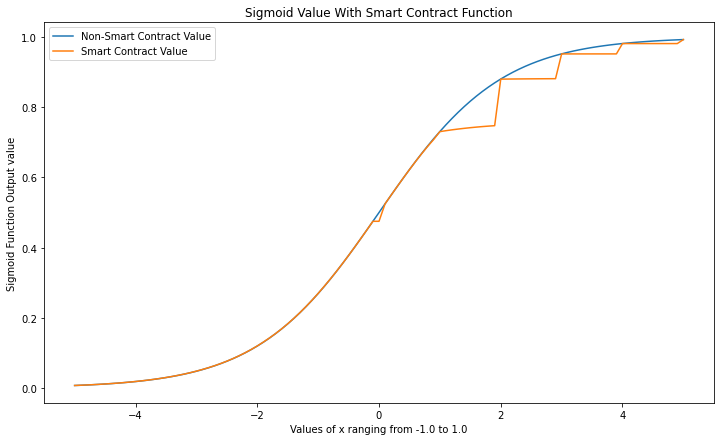

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.plot(d, sig_b, label = "Non-Smart Contract Value")
plt.plot(d, sig_e, label = "Smart Contract Value")
plt.xlabel("Values of x ranging from -1.0 to 1.0")
plt.ylabel("Sigmoid Function Output value")
plt.title("Sigmoid Value With Smart Contract Function")
plt.legend()
plt.savefig("sigmoid_output.pdf")
plt.show()

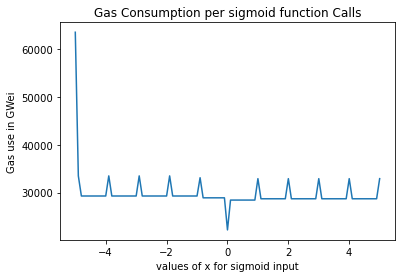

In [105]:
plt.plot(d, gasUse, label="gas Used Per Function Call")
plt.title("Gas Consumption per sigmoid function Calls")
plt.ylabel("Gas use in GWei")
plt.xlabel("values of x for sigmoid input")
plt.savefig("sigmoid_gas.pdf")
plt.show()